# Predicción con Series de Tiempo

En este laboratorio se implementan 5 métodos diferentes para predecir con series de tiempo, utilizando 4 data sets distintos.

In [1]:
# se cargan las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime
from statistics import *
import matplotlib.pylab as p
from math import sqrt
%matplotlib inline

In [2]:
# se cargan los data sets
df_1 = pd.read_csv("daily-total-female-births.csv")

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [4]:
df_1.index = pd.to_datetime(df_1['Date'])
df_1.drop(columns='Date',inplace=True)
df_1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
df_1.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


#### Train and split

In [6]:
#train_test_split
buf = df_1.copy()
#train_test_split
tra = buf['Births'][:181].dropna()
tes = buf['Births'][182:].dropna()

C:\Users\DIANA\AppData\Local\Temp/ipykernel_11276/1336508312.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(buf.Births.dropna(), freq=182)


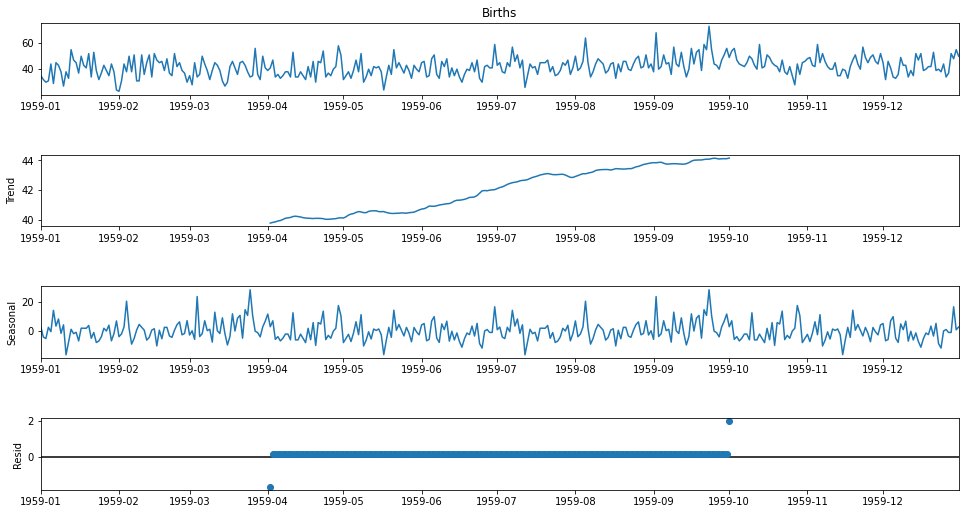

In [7]:
res = sm.tsa.seasonal_decompose(buf.Births.dropna(), freq=182)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

#### 1. Promedio

In [8]:
def prediccion_promedio(historia, config):
    n, tipo_prom = config
    if tipo_prom == "prom":
        return mean(historia[-n:])
    return median(historia[-n:])

In [9]:
print(prediccion_promedio(df_1['Births'], (182, 'prom')))

44.18131868131868


In [10]:
meses = df_1.resample('M').mean()
meses

,Births
Date,
1959-01-31,39.129032
1959-02-28,41.000000
1959-03-31,39.290323
1959-04-30,39.833333
1959-05-31,38.967742
1959-06-30,40.400000
1959-07-31,41.935484
1959-08-31,43.580645
1959-09-30,48.200000


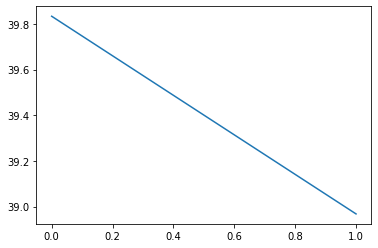

In [11]:
plt.plot(meses['1959-04-30': '1959-05-31'].values)

#### 2. SARIMAX

- Fuente de consulta: https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/ \
https://www.kaggle.com/poiupoiu/how-to-use-sarimax

In [12]:
sarimax = sm.tsa.statespace.SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12),exog = tra,
                                enforce_invertibility=False,freq='D').fit()
sarimax.summary()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Births   No. Observations:                  181
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  73.772
Date:                            Fri, 24 Sep 2021   AIC                           -135.544
Time:                                    22:25:41   BIC                           -116.800
Sample:                                01-01-1959   HQIC                          -127.937
                                     - 06-30-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Births         1.0000   9.26e-07   1.08e+06      0.000       1.000       1.000
ar.L1         -0.1325   1.12e-11  -1.18e+10      0.000      -0.133      -0.133
ma.L1         -0.4247   1.93e-11   -2.2e+10      0.000      -0.425      -0.425
ar.S.L12      -0.5010   1.89e-11  -2.65e+10      0.000      -0.501      -0.501
ma.S.L12      -0.0978   1.35e-11  -7.25e+09      0.000      -0.098      -0.098
sigma2      1.004e-10   1.56e-10      0.642      0.521   -2.06e-10    4.07e-10
===================================================================================
Ljung-Box (L1) (Q):                  62.81   Jarque-Bera (JB):              8703.64
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -5.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  2e+28. Standard errors may be unstable.
"""

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


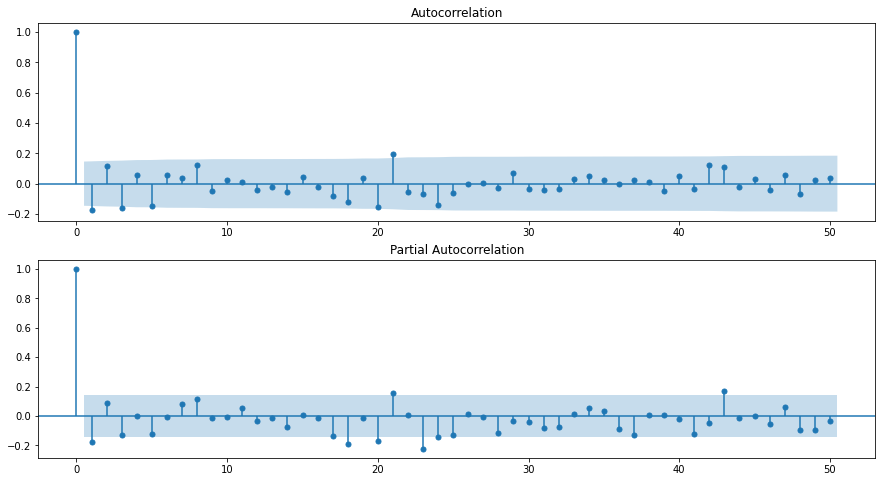

In [13]:
sarima = sm.tsa.statespace.SARIMAX(tra, order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False, 
                                   enforce_invertibility=False, freq='D').fit()
sarima.summary()
res = sarima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
pred = sarimax.predict('1959-07-02','1959-12-30', exog = tes)[1:]
tes1 = tes[:181]
print('SARIMAX model MSE:{}'.format(mean_squared_error(tes1, pred)))
print('SARIMAX model RMSE:{}'.format(sqrt(mean_squared_error(tes1, pred))))

SARIMAX model MSE:85.337072956388
SARIMAX model RMSE:9.237806717851809


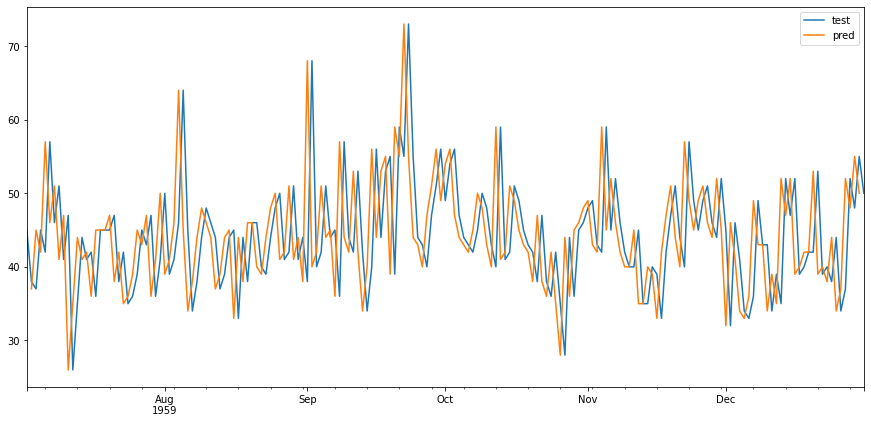

In [15]:
pd.DataFrame({'test':tes,'pred':pred}).plot(figsize=(15, 7))
plt.show()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


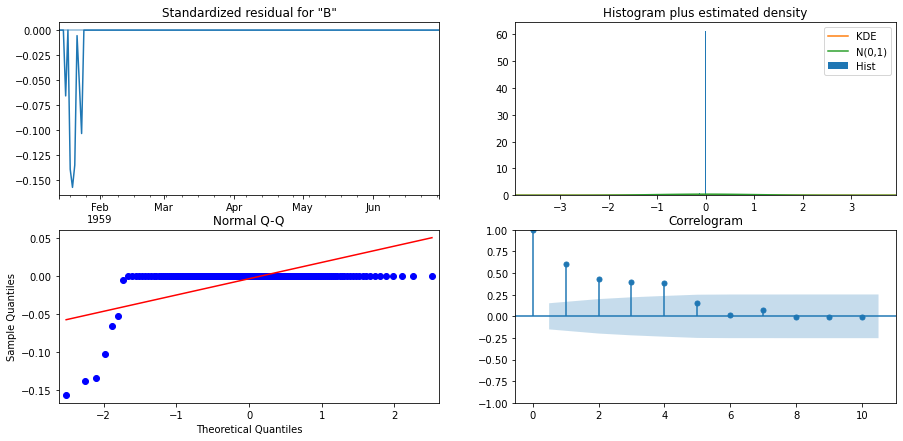

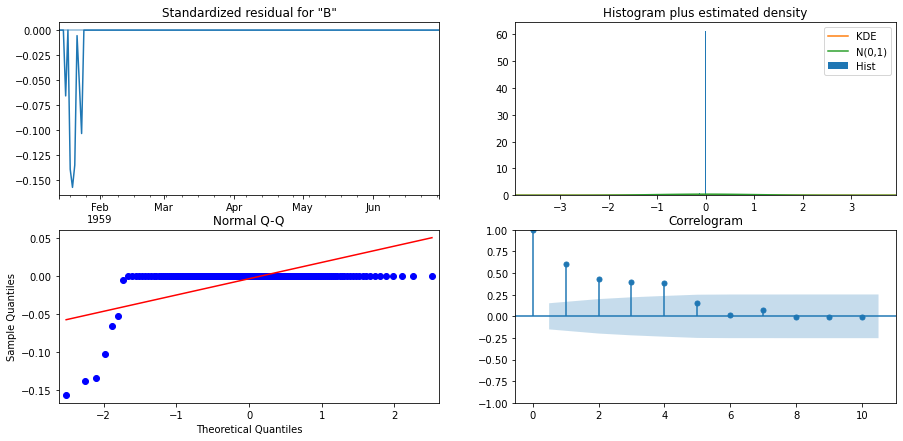

In [16]:
sarimax.plot_diagnostics(figsize=(15, 7))

In [17]:
#Mean Square Error
print(sarimax.mse)
print(sqrt(sarimax.mse))

6.7866654495665994e-09
8.238122024810388e-05


c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Date'>

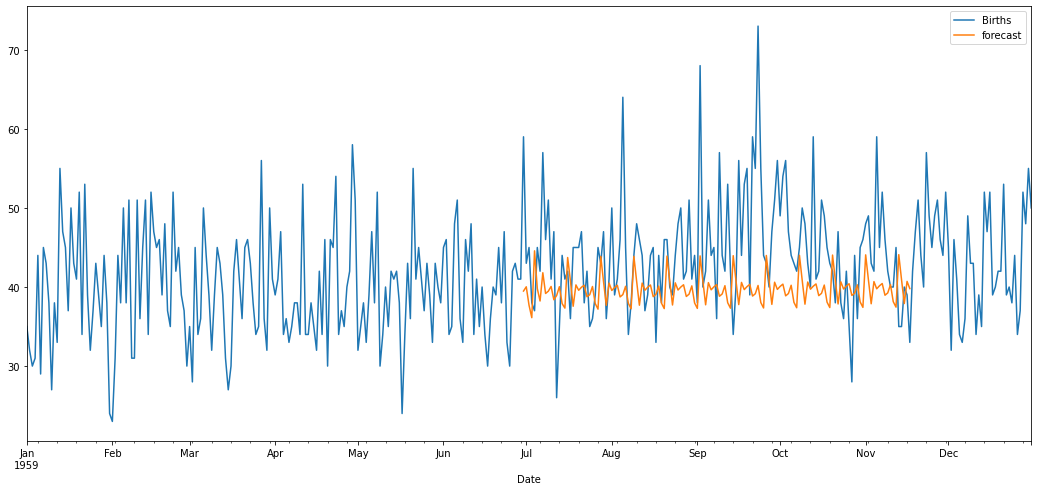

In [18]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_1['Births'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_1['forecast']= results.predict(start=180, end=320, dynamic=True)
df_1[['Births','forecast']].plot(figsize=(18,8))

In [19]:
from pandas.tseries.offsets import DateOffset
pred_date=[df_1.index[-1] + DateOffset(months=x)for x in range(0,24)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=df_1.columns)
pred_date

,Births,forecast
1960-01-31,NaN,NaN
1960-02-29,NaN,NaN
1960-03-31,NaN,NaN
1960-04-30,NaN,NaN
1960-05-31,NaN,NaN
1960-06-30,NaN,NaN
1960-07-31,NaN,NaN
1960-08-31,NaN,NaN
1960-09-30,NaN,NaN
1960-10-31,NaN,NaN


<AxesSubplot:>

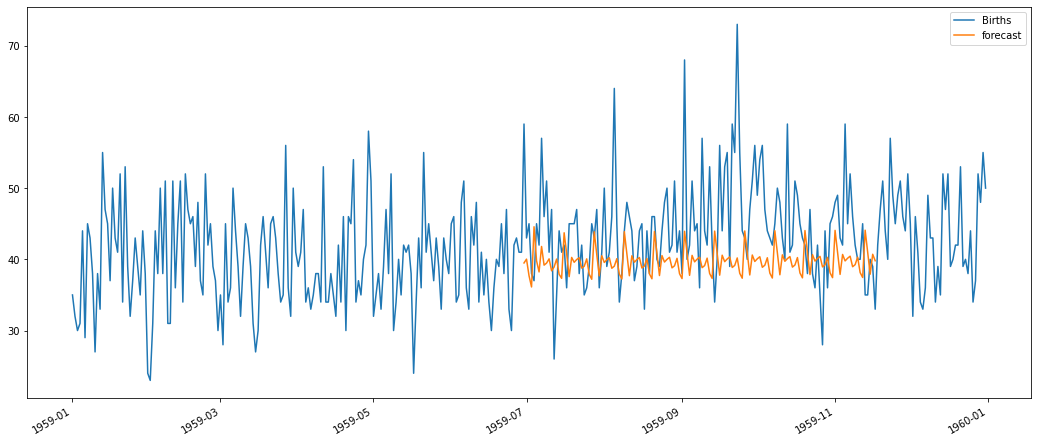

In [20]:
df_1=pd.concat([df_1,pred_date])
df_1['forecast'] = results.predict(start = 180, end = 320, dynamic= True)  
df_1[['Births', 'forecast']].plot(figsize=(18, 8))

#### 3. Winter-Holt

- Fuente de consulta: https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

In [21]:
# se cargan los data sets
df_1 = pd.read_csv("daily-total-female-births.csv")

In [22]:
df_1.index = pd.to_datetime(df_1['Date'])
df_1.drop(columns='Date',inplace=True)
df_1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [23]:
#train_test_split
buf = df_1.copy()

In [24]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:title={'center':'Births Data'}, xlabel='Date'>

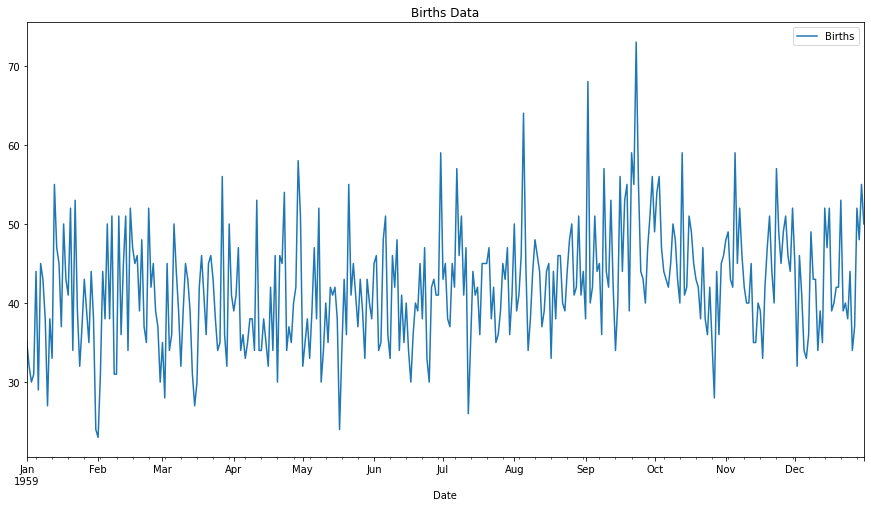

In [25]:
# plotting the original data
df_1[['Births']].plot(title='Births Data', figsize=(15, 8))

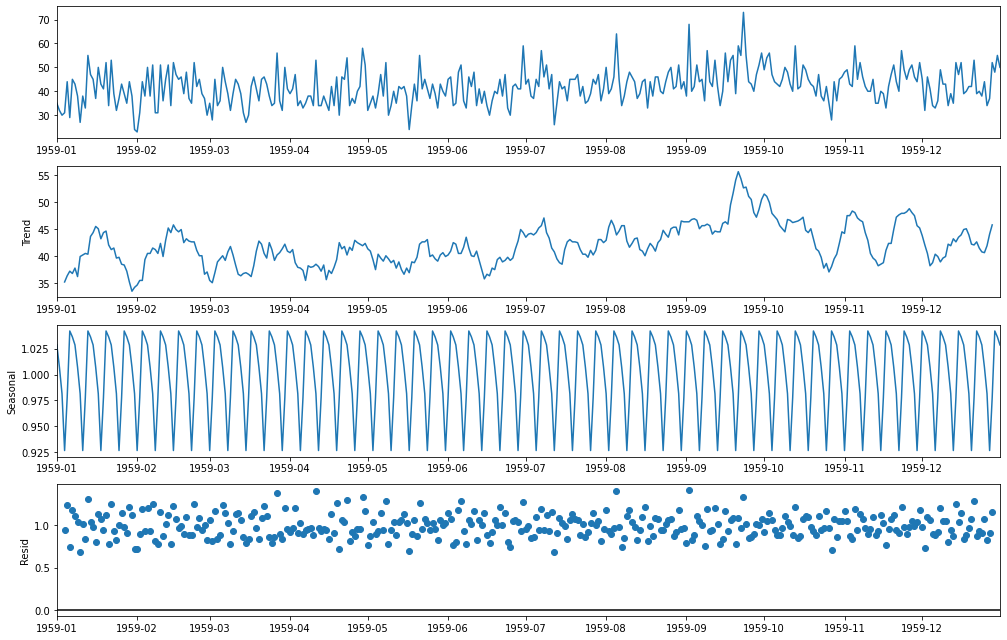

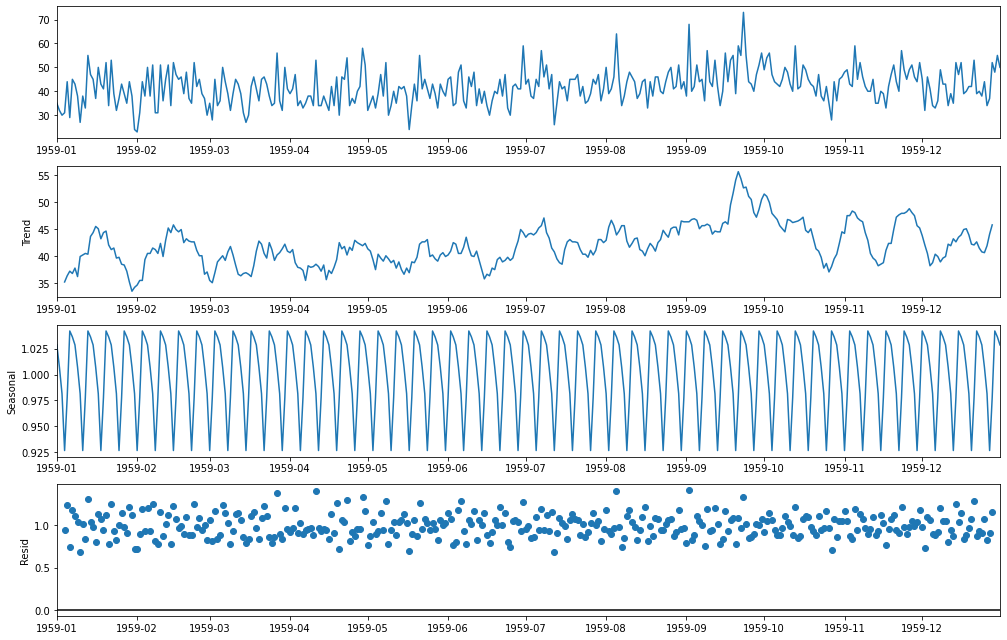

In [26]:
decompose_result = seasonal_decompose(df_1, model='multiplicative')
p.rcParams['figure.figsize'] = (14, 9)
decompose_result.plot()

In [27]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df_1.index.Births = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2 * m)

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='Date'>

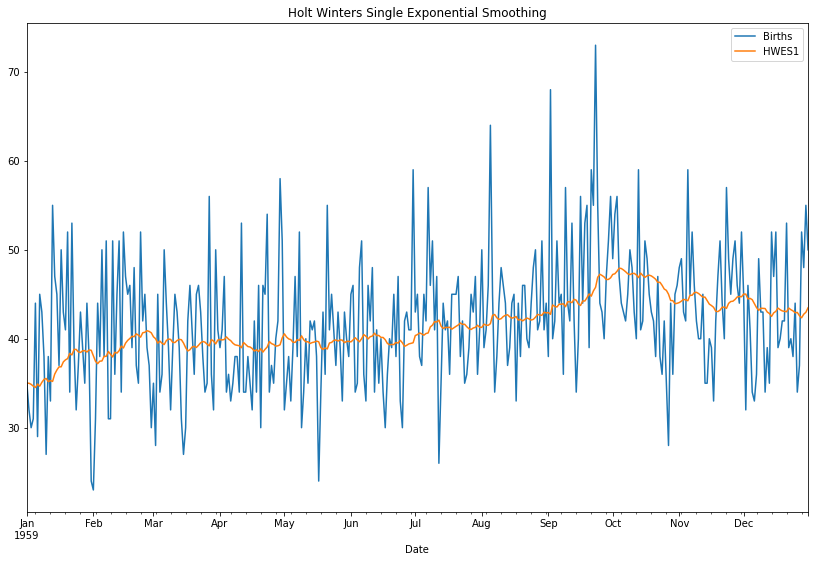

In [28]:
df_1['HWES1'] = SimpleExpSmoothing(df_1).fit(smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
df_1[['Births','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Date'>

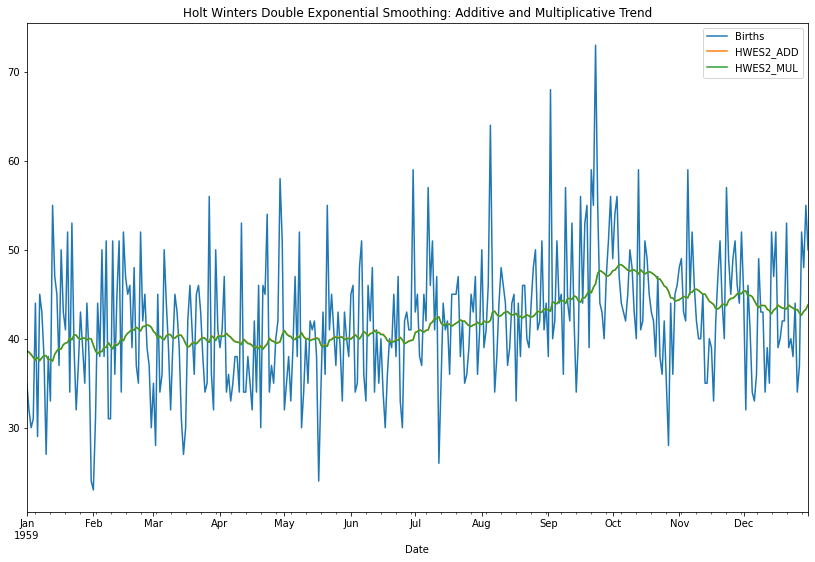

In [29]:
df_1['HWES2_ADD'] = ExponentialSmoothing(df_1['Births'],trend='add').fit().fittedvalues
df_1['HWES2_MUL'] = ExponentialSmoothing(df_1['Births'],trend='mul').fit().fittedvalues
df_1[['Births','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


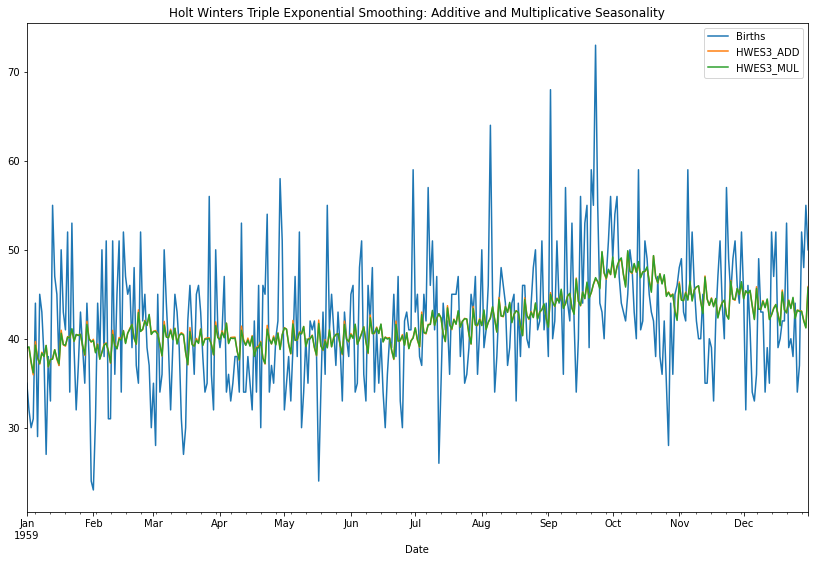

In [30]:
df_1['HWES3_ADD'] = ExponentialSmoothing(df_1['Births'],trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
df_1['HWES3_MUL'] = ExponentialSmoothing(df_1['Births'],trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues
df_1[['Births','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [31]:
#train_test_split
tra = buf[:181].dropna()
tes = buf[182:].dropna()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

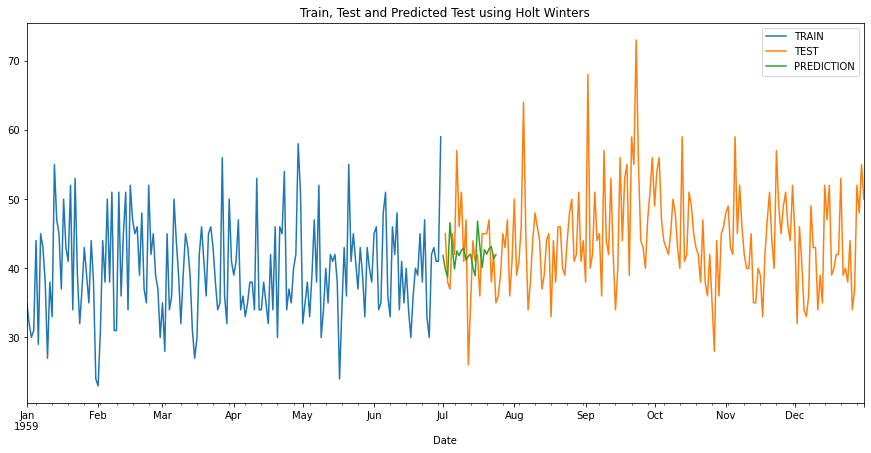

In [32]:
fitted_model = ExponentialSmoothing(tra['Births'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
tra['Births'].plot(legend=True, label='TRAIN')
tes['Births'].plot(legend=True, label='TEST', figsize=(15,7))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

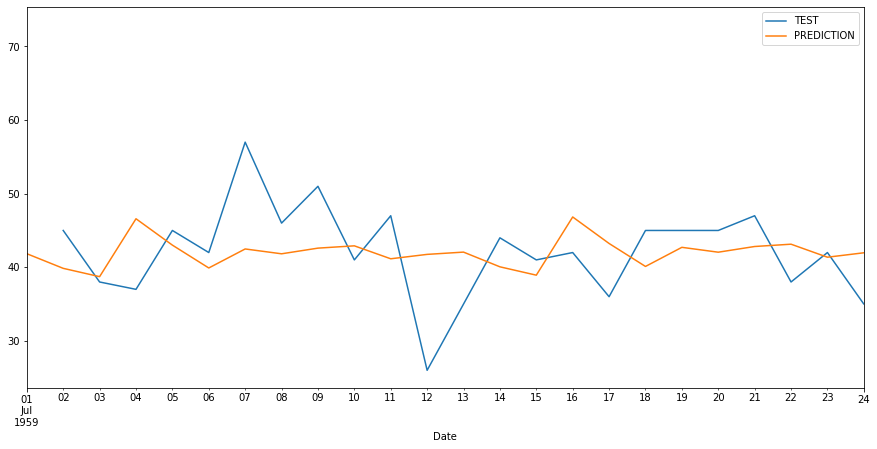

In [33]:
tes['Births'].plot(legend=True,label='TEST',figsize=(15,7))
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1959-07-01','1959-07-24']);

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(tes[:24], test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(tes[:24], test_predictions)}')
print(f'Root Mean Squared Error = {sqrt(mean_squared_error(tes[:24], test_predictions))}')

Mean Absolute Error = 4.820175882970442
Mean Squared Error = 41.334699303645486
Root Mean Squared Error = 6.42920673984322


#### 4. Red Neuronal
- Fuente de consulta: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [35]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# df_1 = pd.read_csv("daily-total-female-births.csv")
dataframe = read_csv('daily-total-female-births.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/100
240/240 - 1s - loss: 0.0340
Epoch 2/100
240/240 - 0s - loss: 0.0195
Epoch 3/100
240/240 - 0s - loss: 0.0196
Epoch 4/100
240/240 - 0s - loss: 0.0194
Epoch 5/100
240/240 - 0s - loss: 0.0194
Epoch 6/100
240/240 - 0s - loss: 0.0192
Epoch 7/100
240/240 - 0s - loss: 0.0192
Epoch 8/100
240/240 - 0s - loss: 0.0192
Epoch 9/100
240/240 - 0s - loss: 0.0191
Epoch 10/100
240/240 - 0s - loss: 0.0191
Epoch 11/100
240/240 - 0s - loss: 0.0193
Epoch 12/100
240/240 - 0s - loss: 0.0191
Epoch 13/100
240/240 - 0s - loss: 0.0191
Epoch 14/100
240/240 - 0s - loss: 0.0191
Epoch 15/100
240/240 - 0s - loss: 0.0190
Epoch 16/100
240/240 - 0s - loss: 0.0190
Epoch 17/100
240/240 - 0s - loss: 0.0188
Epoch 18/100
240/240 - 0s - loss: 0.0190
Epoch 19/100
240/240 - 0s - loss: 0.0188
Epoch 20/100
240/240 - 0s - loss: 0.0191
Epoch 21/100
240/240 - 0s - loss: 0.0189
Epoch 22/100
240/240 - 0s - loss: 0.0190
Epoch 23/100
240/240 - 0s - loss: 0.0189
Epoch 24/100
240/240 - 0s - loss: 0.0190
Epoch 25/100
240/240 - 0s

In [36]:
# calculate Train Root Mean Squared Error (RMSE) 
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 6.81 RMSE
Test Score: 7.79 RMSE


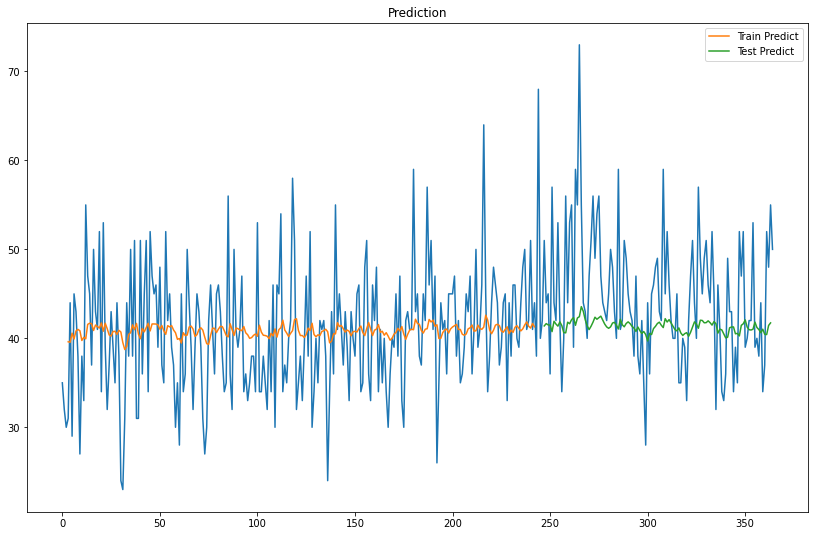

In [37]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title('Prediction')
plt.legend(loc='upper right')
plt.show()